In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy
import seaborn as sns
from scipy import stats
import harry_plotter as hp

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

In [9]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/final_plots/cw_mass_split/'

# initiating catalog class object for all galaxies.
total = catalog.Catalog(basepath, version='mpl9', match_to_lim=True)

# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath, version='mpl9', sigma=3)
total_cen = copy.deepcopy(total) ; total_sat = copy.deepcopy(total)
total_high_mass = copy.deepcopy(total) ; total_low_mass = copy.deepcopy(total) 

total_cen.group_membership(sel='cen', group_cat='lim') 
total_sat.group_membership(sel='sat', group_cat='lim') 
total_cen_high_mass = copy.deepcopy(total_cen) ; total_cen_low_mass = copy.deepcopy(total_cen) 
total_sat_high_mass = copy.deepcopy(total_sat) ; total_sat_low_mass = copy.deepcopy(total_sat) 

# also splitting on stellar mass.
mass_split = 10 #total.df.nsa_elpetro_mass_logscale.median()
total_low_mass.df = total_low_mass.df[total_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
total_high_mass.df = total_high_mass.df[total_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

total_cen_low_mass.df = total_cen_low_mass.df[total_cen_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
total_cen_high_mass.df = total_cen_high_mass.df[total_cen_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

total_sat_low_mass.df = total_sat_low_mass.df[total_sat_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
total_sat_high_mass.df = total_sat_high_mass.df[total_sat_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

In [10]:
# creating composite catalogues for s0sa
s0sa = copy.deepcopy(total) ; s0sa.select_morphology('s0sa')
s0sa_cen = copy.deepcopy(total_cen) ; s0sa_cen.select_morphology('s0sa')
s0sa_sat = copy.deepcopy(total_sat) ; s0sa_sat.select_morphology('s0sa')
s0sa_high_mass = copy.deepcopy(s0sa) ; s0sa_low_mass = copy.deepcopy(s0sa) 

s0sa_cen_high_mass = copy.deepcopy(s0sa_cen) ; s0sa_cen_low_mass = copy.deepcopy(s0sa_cen) 
s0sa_sat_high_mass = copy.deepcopy(s0sa_sat) ; s0sa_sat_low_mass = copy.deepcopy(s0sa_sat) 

# also splitting on stellar mass.
mass_split = 10 #s0sa.df.nsa_elpetro_mass_logscale.median()
s0sa_low_mass.df = s0sa_low_mass.df[s0sa_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
s0sa_high_mass.df = s0sa_high_mass.df[s0sa_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

s0sa_cen_low_mass.df = s0sa_cen_low_mass.df[s0sa_cen_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
s0sa_cen_high_mass.df = s0sa_cen_high_mass.df[s0sa_cen_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

s0sa_sat_low_mass.df = s0sa_sat_low_mass.df[s0sa_sat_low_mass.df.nsa_elpetro_mass_logscale <= mass_split]
s0sa_sat_high_mass.df = s0sa_sat_high_mass.df[s0sa_sat_high_mass.df.nsa_elpetro_mass_logscale > mass_split]

# $D_{node}$

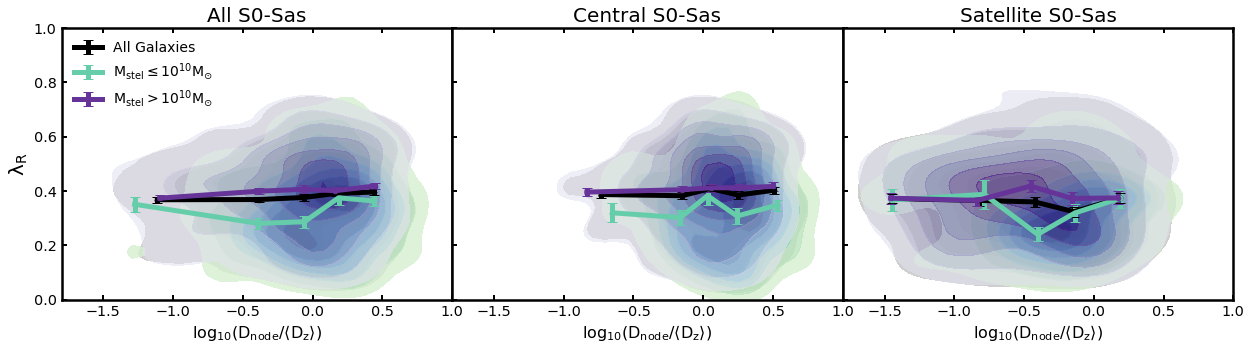

In [17]:
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(s0sa.df.log_dnode_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(s0sa.df.log_dnode_norm, s0sa.df.Lambda_Re, ax=ax[0], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(s0sa_low_mass.df.log_dnode_norm, s0sa_low_mass.df.Lambda_Re, ax=ax[0], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(s0sa_high_mass.df.log_dnode_norm, s0sa_high_mass.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
s0sa_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
s0sa_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$', ax[0], colors=['rebeccapurple'])

# central galaxies
x_bins = np.percentile(s0sa_cen.df.log_dnode_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(s0sa_cen.df.log_dnode_norm, s0sa_cen.df.Lambda_Re, ax=ax[1], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(s0sa_cen_low_mass.df.log_dnode_norm, s0sa_cen_low_mass.df.Lambda_Re, ax=ax[1], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(s0sa_cen_high_mass.df.log_dnode_norm, s0sa_cen_high_mass.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_cen.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])
s0sa_cen_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.35}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
s0sa_cen_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.35}M_{\odot}}$', ax[1], colors=['rebeccapurple'])

# satellite galaxies
x_bins = np.percentile(s0sa_sat.df.log_dnode_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(s0sa_sat.df.log_dnode_norm, s0sa_sat.df.Lambda_Re, ax=ax[2], cmap="binary", shade=True, shade_lowest=False, n_levels=7, alpha=1)
sns.kdeplot(s0sa_sat_low_mass.df.log_dnode_norm, s0sa_sat_low_mass.df.Lambda_Re, ax=ax[2], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(s0sa_sat_high_mass.df.log_dnode_norm, s0sa_sat_high_mass.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_sat.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, 'All Galaxies', ax[2], colors=['k'])
s0sa_sat_low_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.35}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
s0sa_sat_high_mass.plot_binned_percentiles_three_props("log_dnode_norm", "Lambda_Re", "log_dnode_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.35}M_{\odot}}$', ax[2], colors=['rebeccapurple'])

titles = ['All S0-Sas', 'Central S0-Sas', 'Satellite S0-Sas']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{node} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-1.8, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'s0sa_lambdaR_dnode_10mass_split_3sigma.pdf', format='pdf', bbox_inches='tight')


# $D_{skel}$

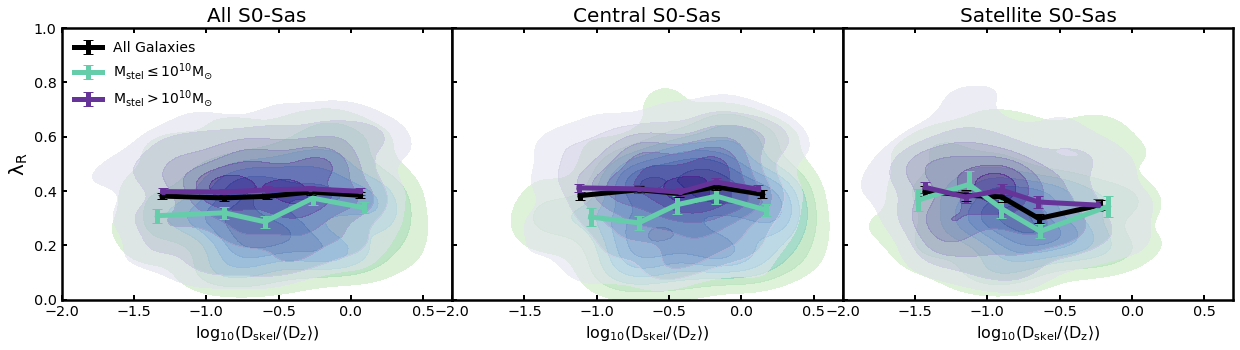

In [16]:
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(s0sa.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(s0sa_low_mass.df.log_dskel_norm, s0sa_low_mass.df.Lambda_Re, ax=ax[0], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(s0sa_high_mass.df.log_dskel_norm, s0sa_high_mass.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
s0sa_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
s0sa_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$', ax[0], colors=['rebeccapurple'])

# central galaxies
x_bins = np.percentile(s0sa_cen.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(s0sa_cen_low_mass.df.log_dskel_norm, s0sa_cen_low_mass.df.Lambda_Re, ax=ax[1], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(s0sa_cen_high_mass.df.log_dskel_norm, s0sa_cen_high_mass.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_cen.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])
s0sa_cen_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.35}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
s0sa_cen_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.35}M_{\odot}}$', ax[1], colors=['rebeccapurple'])

# satellite galaxies
x_bins = np.percentile(s0sa_sat.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(s0sa_sat_low_mass.df.log_dskel_norm, s0sa_sat_low_mass.df.Lambda_Re, ax=ax[2], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(s0sa_sat_high_mass.df.log_dskel_norm, s0sa_sat_high_mass.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_sat.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[2], colors=['k'])
s0sa_sat_low_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.35}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
s0sa_sat_high_mass.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.35}M_{\odot}}$', ax[2], colors=['rebeccapurple'])

titles = ['All S0-Sas', 'Central S0-Sas', 'Satellite S0-Sas']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{skel} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-2, 0.7])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'s0sa_lambdaR_dskel_10mass_split_3sigma.pdf', format='pdf', bbox_inches='tight')



# $D_{skel}$ ($D_{node}$ > 0.5Mpc)

In [13]:
node_dist = 0.5

s0sa_filament = copy.deepcopy(s0sa) 
s0sa_cen_filament = copy.deepcopy(s0sa_cen)
s0sa_sat_filament = copy.deepcopy(s0sa_sat)
s0sa_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
s0sa_cen_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
s0sa_sat_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)

s0sa_low_mass_filament = copy.deepcopy(s0sa_low_mass) 
s0sa_cen_low_mass_filament = copy.deepcopy(s0sa_cen_low_mass)
s0sa_sat_low_mass_filament = copy.deepcopy(s0sa_sat_low_mass)
s0sa_low_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
s0sa_cen_low_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
s0sa_sat_low_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)

s0sa_high_mass_filament = copy.deepcopy(s0sa_high_mass) 
s0sa_cen_high_mass_filament = copy.deepcopy(s0sa_cen_high_mass)
s0sa_sat_high_mass_filament = copy.deepcopy(s0sa_sat_high_mass)
s0sa_high_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
s0sa_cen_high_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)
s0sa_sat_high_mass_filament.select_cw_enviro(feature='no_node', node_dist=node_dist)

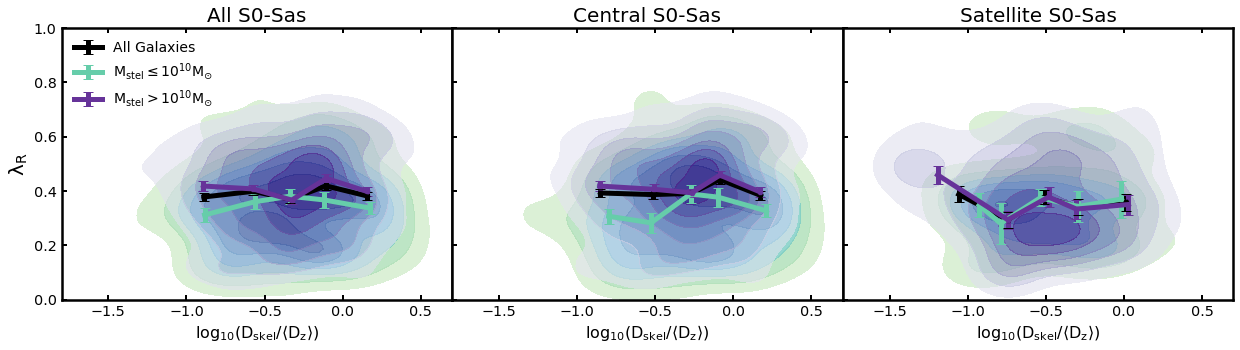

In [15]:
z_percentiles = np.array([0]) 

fig, ax = plt.subplots(1, 3, figsize=(21, 5), sharex='row', sharey='all')

# all galaxies
x_bins = np.percentile(s0sa_filament.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(s0sa_low_mass_filament.df.log_dskel_norm, s0sa_low_mass_filament.df.Lambda_Re, ax=ax[0], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(s0sa_high_mass_filament.df.log_dskel_norm, s0sa_high_mass_filament.df.Lambda_Re, ax=ax[0], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[0], colors=['k'])
s0sa_low_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10}M_{\odot}}$', ax[0], colors=['mediumaquamarine'])
s0sa_high_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10}M_{\odot}}$', ax[0], colors=['rebeccapurple'])

# central galaxies
x_bins = np.percentile(s0sa_cen_filament.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(s0sa_cen_low_mass_filament.df.log_dskel_norm, s0sa_cen_low_mass_filament.df.Lambda_Re, ax=ax[1], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(s0sa_cen_high_mass_filament.df.log_dskel_norm, s0sa_cen_high_mass_filament.df.Lambda_Re, ax=ax[1], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_cen_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[1], colors=['k'])
s0sa_cen_low_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.35}M_{\odot}}$', ax[1], colors=['mediumaquamarine'])
s0sa_cen_high_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.35}M_{\odot}}$', ax[1], colors=['rebeccapurple'])

# satellite galaxies
x_bins = np.percentile(s0sa_sat_filament.df.log_dskel_norm.values, np.linspace(20, 80, 4))

sns.kdeplot(s0sa_sat_low_mass_filament.df.log_dskel_norm, s0sa_sat_low_mass_filament.df.Lambda_Re, ax=ax[2], cmap="GnBu", shade=True, shade_lowest=False, n_levels=7, alpha=0.8)
sns.kdeplot(s0sa_sat_high_mass_filament.df.log_dskel_norm, s0sa_sat_high_mass_filament.df.Lambda_Re, ax=ax[2], cmap="Purples", shade=True, shade_lowest=False, n_levels=7, alpha=0.6)

s0sa_sat_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, 'All Galaxies', ax[2], colors=['k'])
s0sa_sat_low_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} \leq 10^{10.35}M_{\odot}}$', ax[2], colors=['mediumaquamarine'])
s0sa_sat_high_mass_filament.plot_binned_percentiles_three_props("log_dskel_norm", "Lambda_Re", "log_dskel_norm", x_bins, z_percentiles, '$\mathrm{M_{stel} > 10^{10.35}M_{\odot}}$', ax[2], colors=['rebeccapurple'])

titles = ['All S0-Sas', 'Central S0-Sas', 'Satellite S0-Sas']
for ind, a in enumerate(ax):
    a.set_title(titles[ind], fontsize=20)
    a.set_xlabel("$\mathrm{log_{10}(D_{skel} / \langle D_{z} \\rangle )}$", fontsize=16)
    a.set_ylabel(None)

ax[0].legend(frameon=False, fontsize=14, loc='upper left')
ax[0].set_xlim([-1.8, 0.7])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("$\mathrm{\lambda_R}$", fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'s0sa_lambdaR_dskel_no_node_10mass_split_3sigma.pdf', format='pdf', bbox_inches='tight')
